In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [217]:
df = pd.read_csv("list_vehicle.csv")
df

,id,name,type,country_origin,operator_countries,year_start,mass_kg,crew,main_armament,armor_type,engine_type,engine_hp,range_km,speed_kmh,ammo_types
0,1,T-34-85,Средний танк,СССР,"СССР, Чехословакия, Польша, Венгрия, ГДР, КНР,...",1944,32000.0,5,85-мм пушка,Катаная стальная гомогенная,Дизель,500.0,300.0,55.0,"Бронебойный, ОФС"
1,2,ИС-2,Тяжелый танк,СССР,"СССР, Китай, Польша, Чехословакия",1943,46000.0,4,122-мм пушка,Катаная и литая стальная,Дизель,600.0,240.0,37.0,"Бронебойный, ОФС"
2,3,КВ-1,Тяжелый танк,СССР,"СССР, Финляндия",1939,45000.0,5,76-мм пушка,Катаная стальная,Дизель,600.0,250.0,34.0,"Бронебойный, ОФС"
3,4,Т-54,Основной боевой танк,СССР,"СССР, Россия, Афганистан, Албания, Алжир, Анго...",1947,36000.0,4,100-мм пушка,Катаная стальная гомогенная,Дизель,520.0,400.0,50.0,"БОПС, КС, ОФС"
4,5,Т-62,Основной боевой танк,СССР,"СССР, Россия, Афганистан, Алжир, Ангола, Белар...",1961,37000.0,4,115-мм пушка,Катаная стальная гомогенная,Дизель,580.0,450.0,50.0,"БОПС, КС, ОФС"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Тунгуска,ЗСУ,СССР,"Россия, Индия, Украина, Йемен",1982,34000.0,4,2x30-мм автопушки,Стальная,Дизель,790.0,500.0,65.0,"ОФС, Зенитные ракеты"
96,97,C1 Ariete Hitfact,Основной боевой танк,Италия,Италия (прототип),2002,60000.0,4,120-мм пушка,Композитная,Дизель,1600.0,600.0,65.0,"БОПС, КС"
97,98,Zulfiqar,Основной боевой танк,Иран,Иран,1996,36000.0,3,125-мм пушка,Композитная,Дизель,780.0,450.0,70.0,"БОПС, КС"
98,99,Karrar,Основной боевой танк,Иран,Иран,2017,51000.0,3,125-мм пушка,"Композитная, ДЗ",Дизель,1000.0,550.0,70.0,"БОПС, КС, ПТУР"


### Анализ 1: Эволюция и гонки вооружений
#### Разработка военной техники неравномерна во времени и активизируется в периоды мировых конфликтов и напряженности (Вторая мировая война, Холодная война).
На этом графике мы видим распределение производства новой техники по десятилетиям. Отчетливо видны два пика: первый в 1940-х, что соответствует Второй мировой войне, и второй, растянутый с 1960-х по 1980-е, - пик Холодной войны. В современности все еще очень высок уровень мировой напряженности, около 55 вооруженных конфликтов по всему миру, из-за чего урвоень производтсва вооружений не снижается. Это доказывает, что исторические периоды напрямую влияют на технологические скачки. Мой проект позволяет пользователю мгновенно отфильтровать технику по этим ключевым временным промежуткам и самостоятельно изучить, какие именно технологии появлялись в эти эпохи.

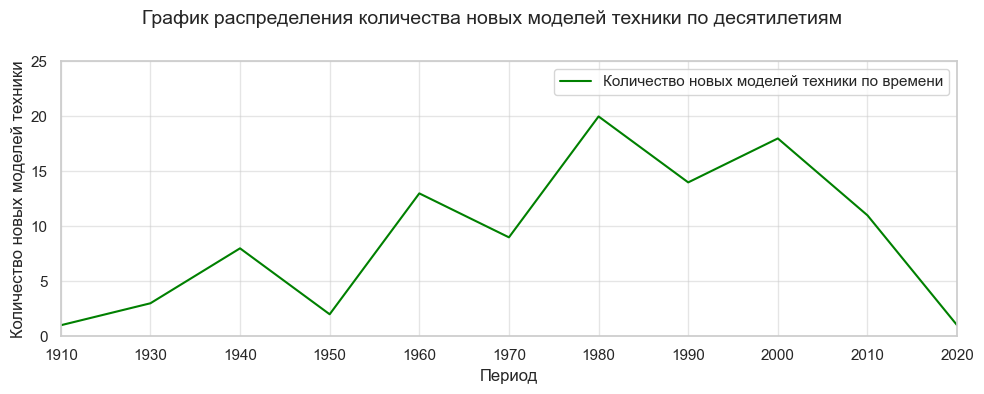

In [180]:
decade = sorted(list((df['year_start'] // 10) * 10))
decade_Series = pd.Series(decade)
counts_decade = decade_Series.value_counts()
sorted_counts_decade = counts_decade.sort_index()

x = np.arange(11)

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, sorted_counts_decade.values, label='Количество новых моделей техники по времени', color='green', zorder=2)

fig.suptitle(r'График распределения количества новых моделей техники по десятилетиям', fontsize=14)
ax.set_xlabel('Период')
ax.set_ylabel('Количество новых моделей техники')

ax.grid(True, alpha=0.5)

ax.legend()

ax.set(xlim=(0, 10))
ax.set(ylim=(0, 25))

xticks = np.arange(11)
xticklabels = sorted_counts_decade.index
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

plt.tight_layout()
plt.show()

### Анализ 2: Сравнение национальных «инженерных школ»
#### Разные страны-лидеры придерживаются разных философий в танкостроении. Например, можно проверить стереотип: "советские танки более легкие и быстрые, а западные - тяжелее и мощнее".
Эта диаграмма сравнивает массу и мощность двигателей танков ведущих стран. Мы видим несколько кластеров. Танки СССР/России (красные точки) исторически тяготеют к меньшей массе при сохранении высокой удельной мощности. Американские и немецкие танки (синие и зеленые точки) смещены вправо и вверх - они тяжелее, но с очень мощными двигателями. Это наглядно показывает разницу в подходах к проектированию. Именно для такого многофакторного анализа и сравнения и был создан мой проект - пользователь может выбрать любые две машины и в удобной таблице сопоставить их характеристики.

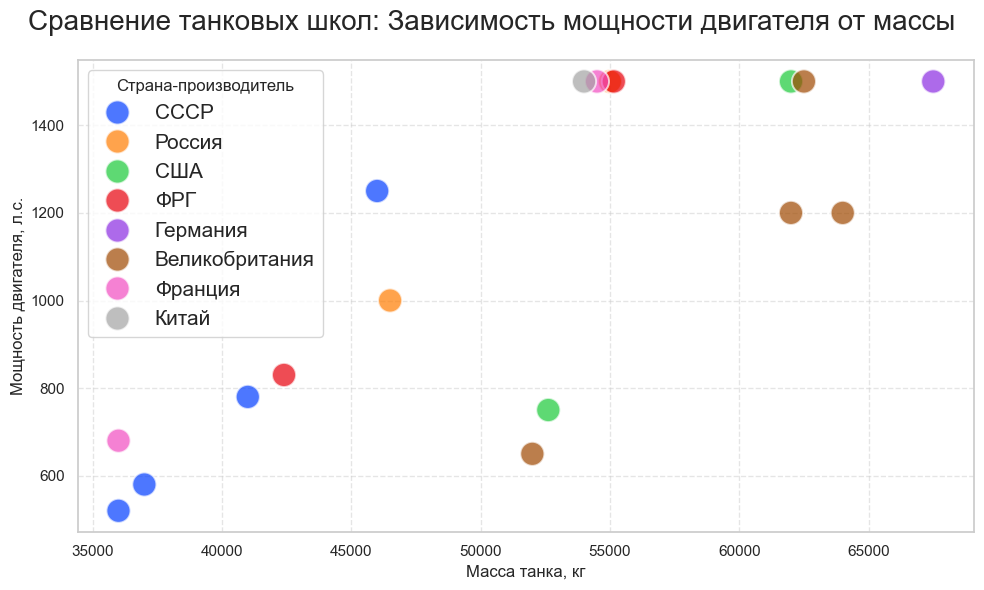

In [124]:
counttries_to_show = ['СССР', 'Россия', 'Китай', 'США', 'Германия', 'Великобритания','ФРГ', 'Франция']
main_battle_tank = df[(df['type'] == "Основной боевой танк") & (df['country_origin'].isin(counttries_to_show))].copy()

sns.set_theme(style="whitegrid", palette="bright")

fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(main_battle_tank, x='mass_kg', y='engine_hp', hue='country_origin', s=300, alpha=0.7)

fig.suptitle(r'Сравнение танковых школ: Зависимость мощности двигателя от массы', fontsize=20)
ax.set_xlabel('Масса танка, кг')
ax.set_ylabel('Мощность двигателя, л.с.')

ax.grid(True, linestyle='--', alpha=0.5)

ax.legend(title='Страна-производитель', fontsize=15)

plt.tight_layout()
plt.show()

### Анализ 3: Вооруженность крупных государств
#### Страны, имеющие наибольшее влияние обладают и наибольшим количетсвом военной техники
Графики это подтверждают. Как мы видим чем большую территорию и влияние на мир имеет государство, тем большее количетсво различных вооружений собственного производства оно имеет. Но почему именно собственного? Все просто, чтобы не зависить от другой, например противоборствующей или далекой по расположению страны. Так например СССР должен был иметь 100% моделей собственного производства, из-за своей политики. А например менее развитые страны не могут тратить большие суммы на производство собственных моделей, и вынуждены покупать у более влиятельных стран вооружения.


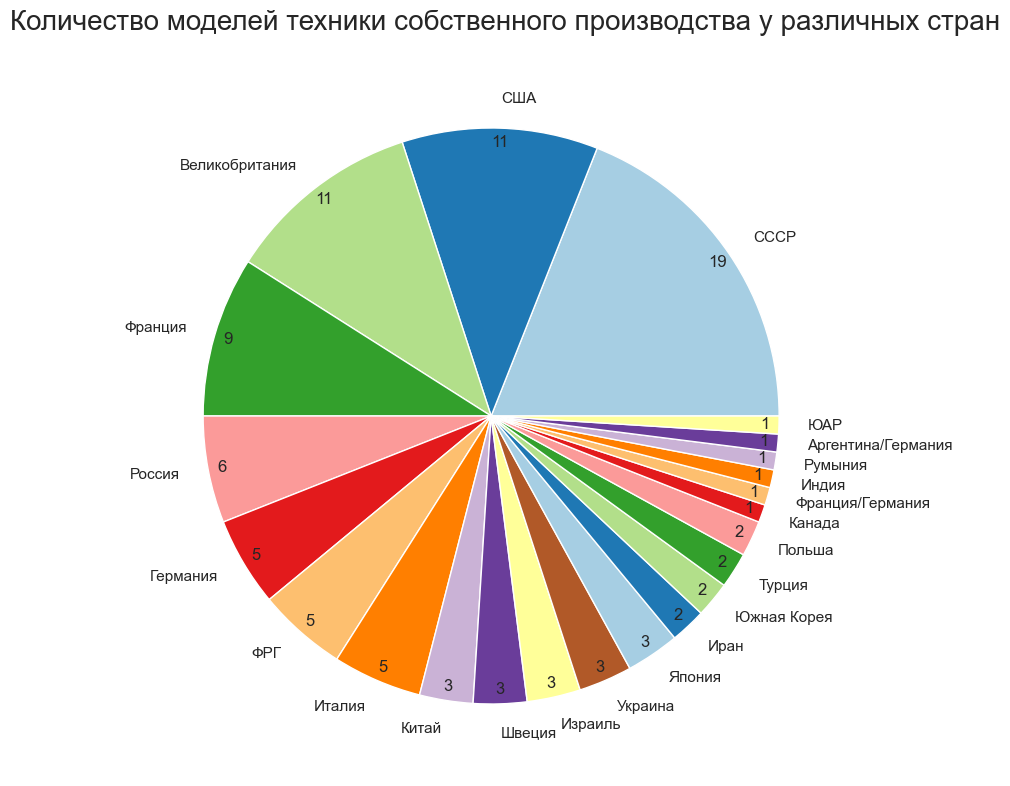

In [178]:
counts_of_models = df['country_origin'].value_counts()

colors = sns.color_palette('Paired')

fig, ax = plt.subplots(figsize=(10, 8))

ax.pie(counts_of_models, labels=counts_of_models.index, labeldistance=1.1, autopct='%1i', pctdistance=0.95, colors=colors)

fig.suptitle(r'Количество моделей техники собственного производства у различных стран', fontsize=20)

plt.tight_layout()
plt.show()

### Анализ 4: Глобально влияние (Экспортный успех)
#### Некоторые модели техники стали настолько успешными, что были приняты на вооружение десятками стран, что говорит об их эффективности, надежности или политическом влиянии страны-производителя.
Перед вами рейтинг техники по ее глобальному распространению. Такие машины, как Т-54/55, БМ-21 или БТР-80, можно назвать 'автоматами Калашникова' в мире бронетехники. Они определили облик армий десятков стран. Анализируя эти данные, пользователи моего сайта могут изучать не только технику, но и геополитику, и историю военно-технического сотрудничества.

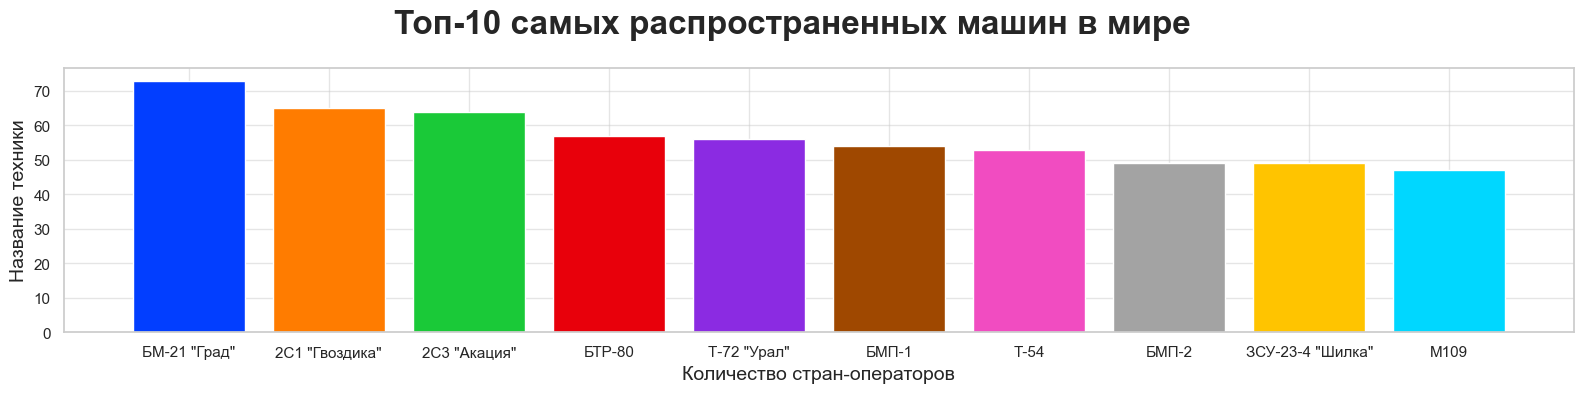

In [ ]:
df['num_operators'] = df['operator_countries'].str.count(',') + 1
top_10_exported = df.sort_values(by='num_operators', ascending=False).head(10)

colors = sns.color_palette('bright')

fig, ax = plt.subplots(figsize=(16, 4))

ax.bar(top_10_exported['name'], top_10_exported['num_operators'], label='Количество новых моделей техники по времени', color=colors, zorder=2)

fig.suptitle(r'Топ-10 самых распространенных машин в мире', fontsize=24, fontweight='bold')
ax.set_xlabel('Количество стран-операторов', fontsize=14)
ax.set_ylabel('Название техники', fontsize=14)

ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### Анализ 5: Эволюция Огневой Мощи
#### Основной калибр орудий танков неуклонно рос на протяжении XX века, что отражает постоянную "гонку" между броней и снарядом.
Этот график наглядно демонстрирует гонку вооружений: мы видим четкий восходящий тренд увеличения калибров танковых орудий. Если в 1940-х годах стандартом были 75-85 мм, то к концу века доминирующим стал калибр 120-125 мм. Способность моего проекта работать не только с числами, но и извлекать данные из текстовых описаний, позволяет проводить вот такие глубокие историко-технические анализы

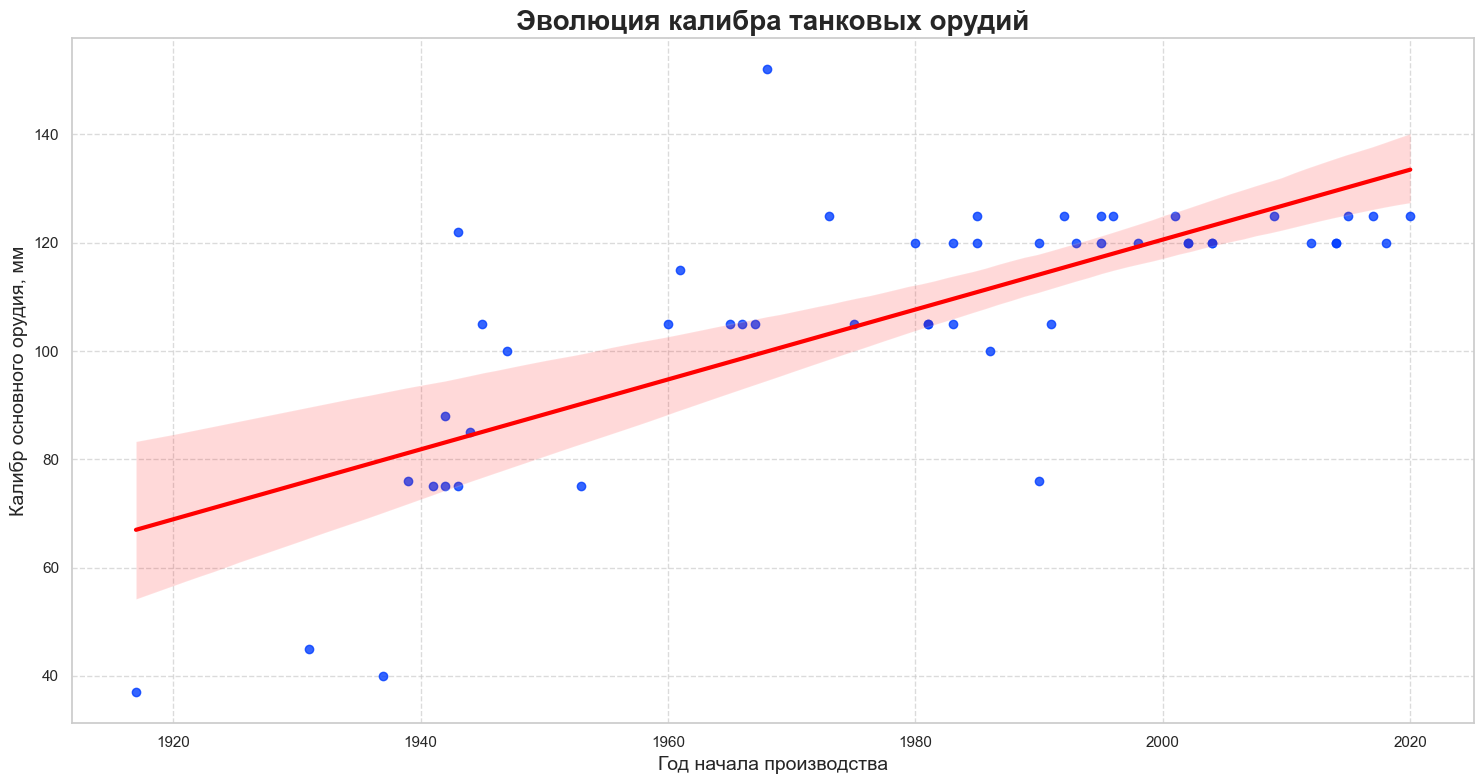

In [244]:
df['caliber_mm'] = df['main_armament'].str.extract('(\\d+)').astype(float)
tanks_df = df[df['type'].str.contains('танк', case=False)].dropna(subset=['caliber_mm'])

plt.figure(figsize=(15, 8))

sns.regplot(data=tanks_df, x='year_start', y='caliber_mm', line_kws={"color": "red", "lw": 3})

plt.title('Эволюция калибра танковых орудий', fontsize=20, fontweight='bold')
plt.xlabel('Год начала производства', fontsize=14)
plt.ylabel('Калибр основного орудия, мм', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()